In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

Get the stock data from Yahoo finance from Jan 1st 2006 to Jan 1st 2016 for the following 6 banks: Bank of America, CitiGroup, Goldman Sachs, JPMorgan Chase, Morgan Stanley, Wells Fargo

In [2]:
start = datetime.datetime(2006, 1, 1)
end   = datetime.datetime(2016, 1, 1)

BAC = data.DataReader("BAC", 'yahoo', start, end)  # Bank of America
C   = data.DataReader("C", 'yahoo', start, end)    # CitiGroup
GS  = data.DataReader("GS", 'yahoo', start, end)   # Goldman Sachs
JPM = data.DataReader("JPM", 'yahoo', start, end)  # JPMorgan Chase
MS  = data.DataReader("MS", 'yahoo', start, end)   # Morgan Stanley
WFC = data.DataReader("WFC", 'yahoo', start, end)  # Wells Fargo

In [3]:
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.658106
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.418499
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.395836
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.515644
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.512400

[5 rows x 36 columns]

Returns for each bank's stock:

In [4]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


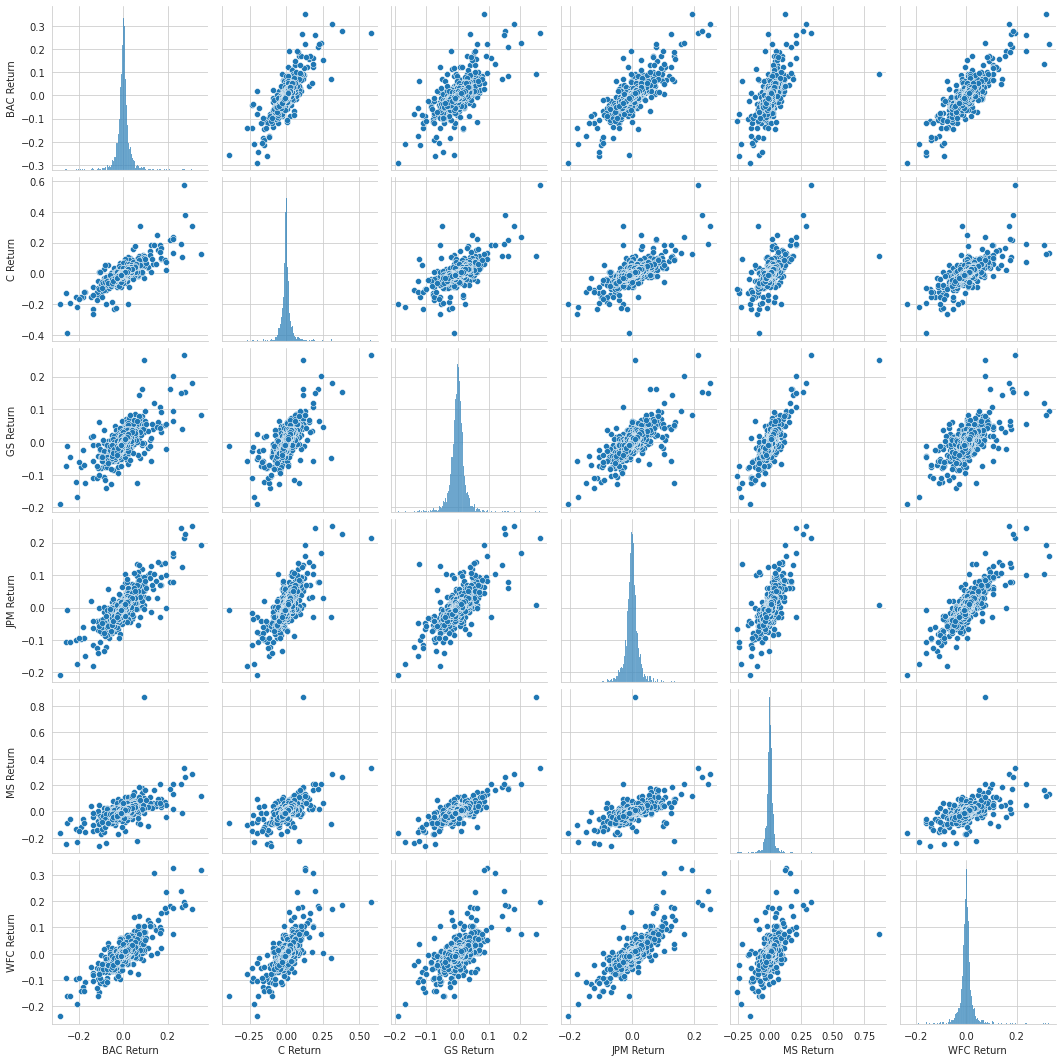

In [5]:
import seaborn as sns
sns.pairplot(returns[1:])

 Line plot showing Close price for each bank:

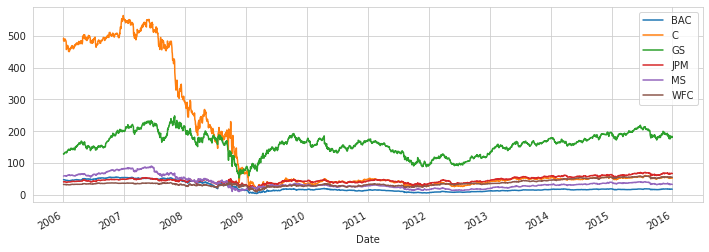

In [6]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

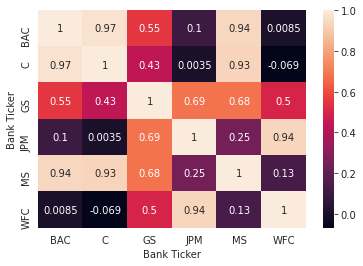

In [7]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

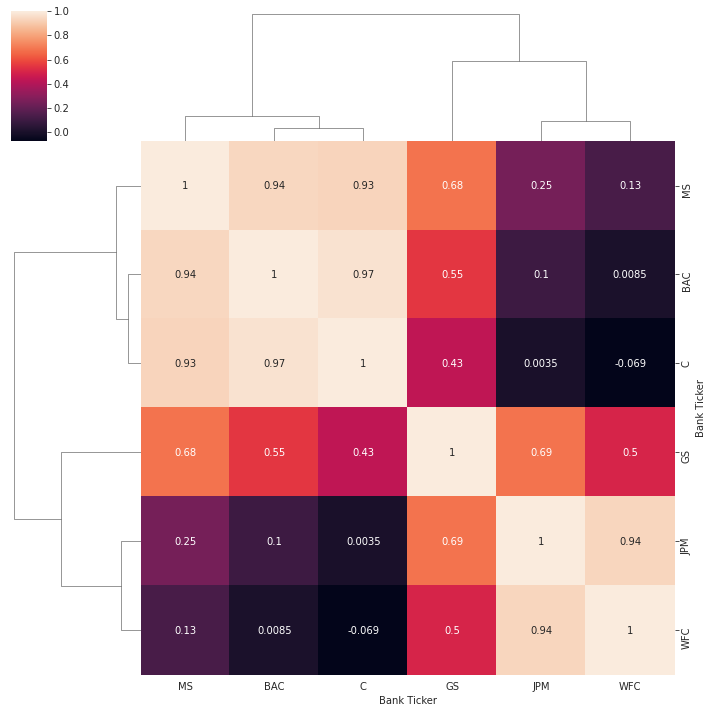

In [8]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)